In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.utils import plot_model
from importlib.resources import path
import numpy as np
import matplotlib.pyplot as plt
import gradio as gr

2022-09-07 14:19:33.774815: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-09-07 14:19:34.761812: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-07 14:19:34.761851: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
(X_train, Y_train), (x_test, y_test) = mnist.load_data()

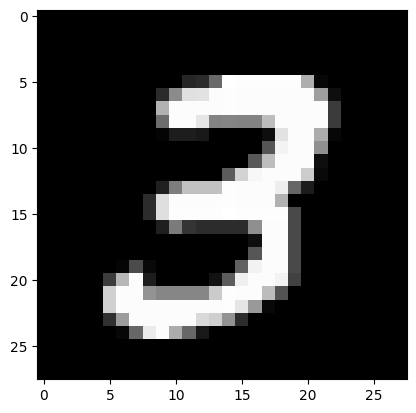

In [3]:
plt.imshow(X_train[7], cmap="gray")
plt.show()

Here I am normalizing the data instead of being form 0 to 255 I am making it between 0 and 1

In [54]:
from tensorflow.keras.utils import normalize


X_train = X_train / 255.0
x_test = x_test / 255.0

Here we I will create the neural network that I will train to classify the digits.

In [55]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

Now after creating the neural network, I will train it on the MNIST dataset

In [56]:
model.compile(
    optimizer=Adam(0.001),
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

model.fit(
    X_train, 
    Y_train,
    epochs=100
)

Epoch 1/100
1875/1875 [==============================] - 11s 4ms/step - loss: 0.7443 - accuracy: 0.7682
Epoch 2/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3866 - accuracy: 0.8843
Epoch 3/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3063 - accuracy: 0.9096
Epoch 4/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2484 - accuracy: 0.9260
Epoch 5/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2079 - accuracy: 0.9378
Epoch 6/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1756 - accuracy: 0.9468
Epoch 7/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1519 - accuracy: 0.9542
Epoch 8/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1325 - accuracy: 0.9597
Epoch 9/100
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1179 - accuracy: 0.9644
Epoch 10/100
1875/1875 [==============================] - 11s 6ms/step 

Saving the model to not do the whole trainning again.

In [57]:
model.save("digit_classification.h5")

Here we will store the predicitons from the test dataset. 

In [58]:
predictions = model.predict([x_test])

313/313 [==============================] - 1s 3ms/step


Here we are trying to display the results of some predictions.

9


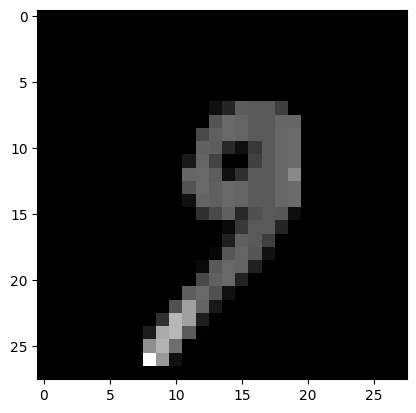

In [59]:
print(np.argmax(predictions[1000]))
plt.imshow(x_test[1000], cmap='gray')
plt.show()

Finally, here is the accuracy of the model:

In [69]:
(model_loss, model_accuracy) = model.evaluate(X_train, Y_train)

1875/1875 [==============================] - 5s 2ms/step - loss: 0.0030 - accuracy: 0.9992


In [67]:
print(f'the accuracy of my model is: {model_accuracy * 100}%')

the accuracy of my model is: 97.89999723434448%


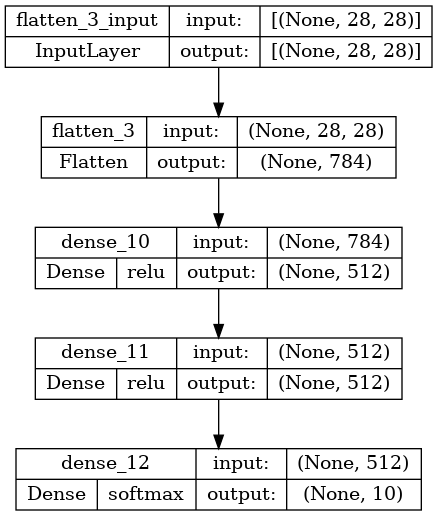

In [62]:
plot_model(
    model, 
    to_file='NN_model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TL",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)